# Term Deposit Marketing

The Project coming from a startup specializing in machine learning solutions for the European banking sector, tackling challenges such as fraud detection, sentiment analysis, and customer intention prediction. Our current focus is on developing a robust system that leverages call center data to improve customer engagement. The ultimate goal is to enhance the success rate of customer calls for various banking products, while ensuring the model remains interpretable so clients can make informed business decisions.

### Data Description:

The dataset originates from the direct marketing campaigns of a European bank. These campaigns involved repeated phone calls to customers with the goal of promoting a term deposit product. Term deposits are short‑term savings instruments, typically ranging from one month to a few years, where funds can only be withdrawn once the agreed term has ended. To protect customer privacy, all personally identifiable information has been removed from the dataset.

### Goals:

The primary goal of this project is to predict whether a customer will subscribe to a term deposit, achieving at least 81% accuracy through 5‑fold cross validation. Beyond prediction, we aim to identify customer segments most likely to invest, highlight the key features driving purchase decisions, and provide interpretable insights that empower clients to prioritize outreach strategies effectively

# libraries

In [21]:
# basics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Handling imbalanced dataset 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
# Convert Categorical Variable to Numeric
from sklearn.preprocessing import LabelEncoder 

# Modeling

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report ,ConfusionMatrixDisplay,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection

# Hyperparameter Optimizations

import optuna

import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
import random
# Define a fixed random state value
RANDOM_STATE =4230
# Set Python's built-in random seed
random.seed(RANDOM_STATE)
# Set PYTHONHASHSEED environment variable for reproducibility in some cases
os.environ['PYTHONHASHSEED'] = str(RANDOM_STATE)

# Set NumPy's random seed
np.random.seed(RANDOM_STATE)

In [4]:
Data=pd.read_csv("term-deposit-marketing-2020.csv")
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


## Attributes:

- age : age of customer (numeric)

- job : type of job (categorical)

- marital : marital status (categorical)

- education (categorical)

- default: has credit in default? (binary)

- balance: average yearly balance, in euros (numeric)

- housing: has a housing loan? (binary)

- loan: has personal loan? (binary)

- contact: contact communication type (categorical)

- day: last contact day of the month (numeric)

- month: last contact month of year (categorical)

- duration: last contact duration, in seconds (numeric)

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

- Output (desired target): y - has the client subscribed to a term deposit? (binary)



# Getting the Data Info

In [50]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


- Rows and columns: 40000 Rows, 14 columns
- Types of variables: 5 Numeric variables, 9 Categorical  variables

# Checking Missing Values

In [51]:
Data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

- It appears that the dataframe does not contain missing values overall. However, certain features do include null entries—specifically, 3,209 in Balance and 3 in Duration. Let’s examine a sample of these subsets.


# Data Visualization for Categorical Variables

- Categorical Variables: job, marital,education, default,housing, loan, contact,month,deposit

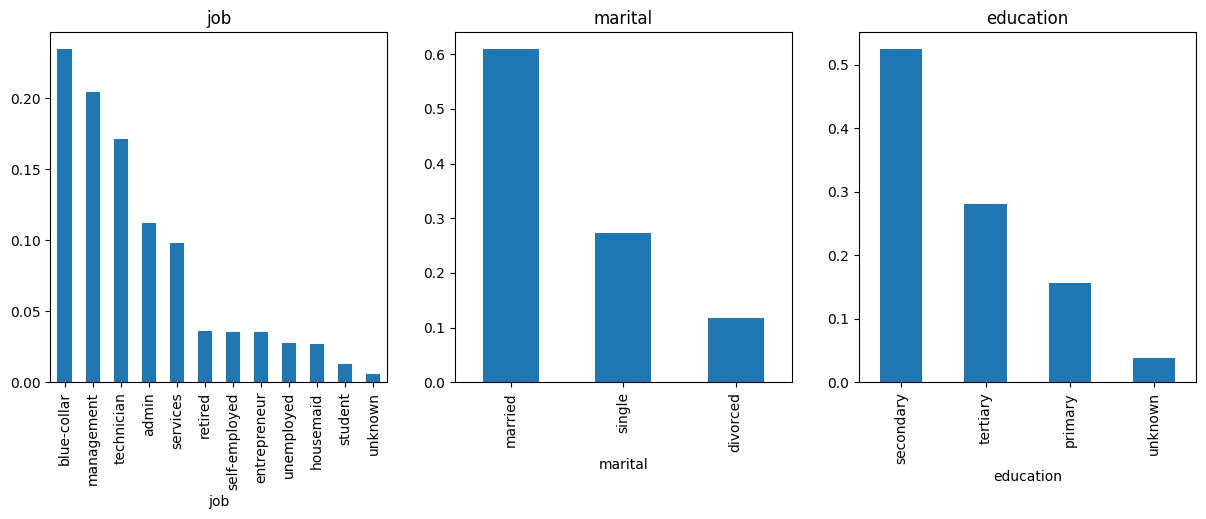

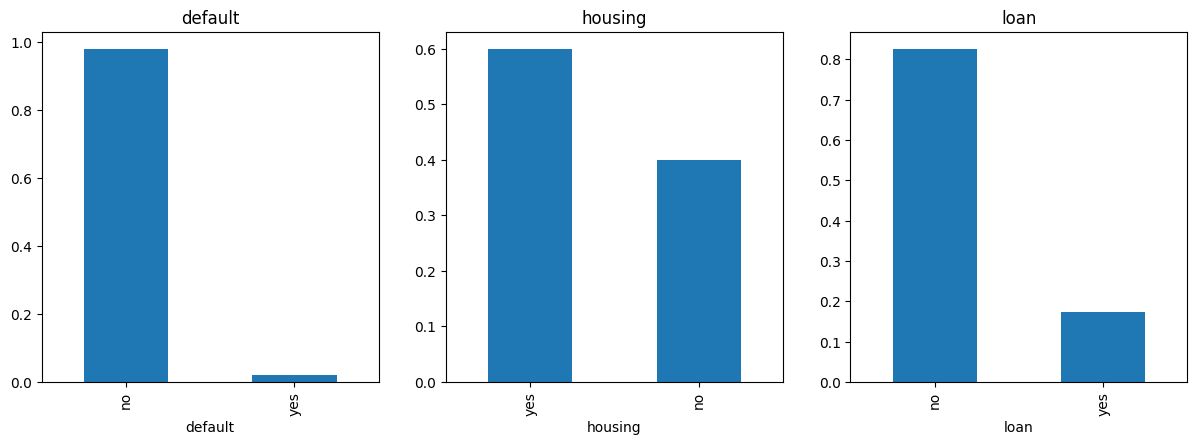

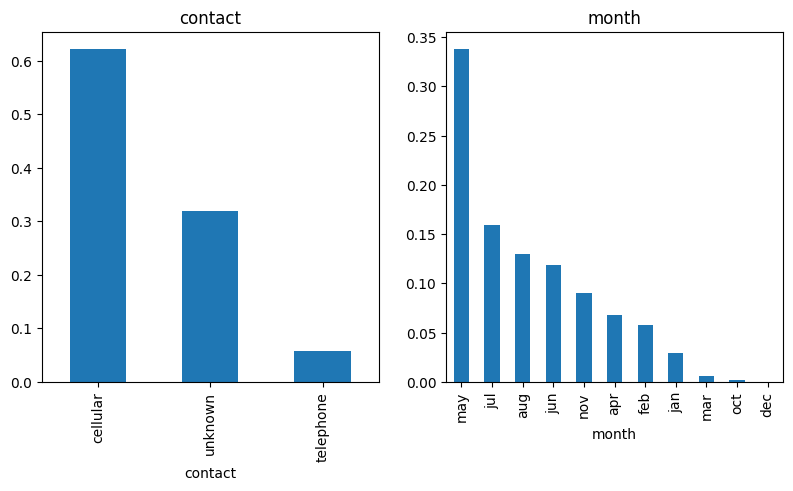

In [52]:
# 2.1.2. categorical variables

plt.figure(1)

plt.subplot(241)

Data['job'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='job')

plt.subplot(242)
Data['marital'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='marital')

plt.subplot(243)
Data['education'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='education')

plt.show()


plt.figure(2)

plt.subplot(241)
Data['default'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='default' )

plt.subplot(242)
Data['housing'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='housing')

plt.subplot(243)
Data['loan'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='loan')

plt.show()

plt.figure(1)

plt.subplot(241)
Data['contact'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='contact')

plt.subplot(242)
Data['month'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='month')



plt.show()

- From the results above, we can see that qualitative variables are divided into 2 groups: 3 binary variables, and 5 multi categorical variables
- The features which are having unknown class is job, education, contact

# Replacing unknown class with mode of the particular feature

In [53]:
Data["job"].replace(["unknown"],Data["job"].mode(),inplace = True)
Data["education"].replace(["unknown"],Data["education"].mode(),inplace = True)
Data["contact"].replace(["unknown"],Data["contact"].mode(),inplace = True)

# Segmentation and Classification Strategy

We set out to lower marketing expenses and maximize revenue by adopting a more strategic approach to customer outreach. Our method combined segmentation and classification, allowing us to move away from contacting all customers indiscriminately . Instead, we focused on identifying those most likely to show interest Term deposits.

# Customer Segmentation

We divided the features into two segments: **Demographic Segmentation:**  That included the following categories: age, job, marital,education,Default , Balance , Housing and Loan **Campaign Segmentation** This included the categories of Contact , Day, Month < Duration  and compaign 

## Demographic Segmentation:

In [54]:
features_to_drop = ['contact', 'day', 'month','duration','campaign']
Demo_Data= Data.drop(columns=features_to_drop)

In [55]:
Demo_Data.head()

,age,job,marital,education,default,balance,housing,loan,y
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
3,47,blue-collar,married,secondary,no,1506,yes,no,no
4,33,blue-collar,single,secondary,no,1,no,no,no


# BIVARIATE ANALYSIS:

# Districution of customers Subscribed to Term Deposit 

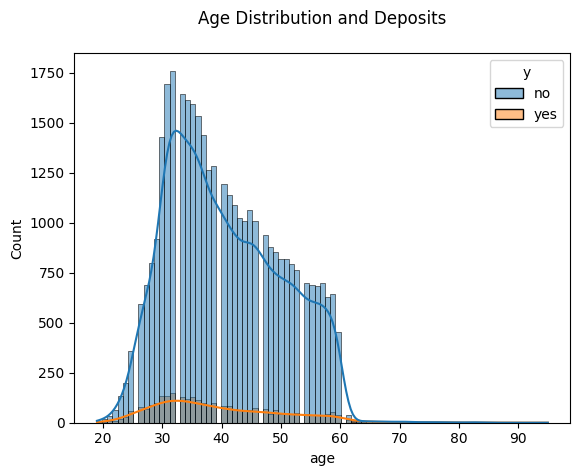

In [56]:
sns.histplot(x="age", data=Demo_Data, kde=True, hue= "y")
plt.title("Age Distribution and Deposits\n")
plt.show()

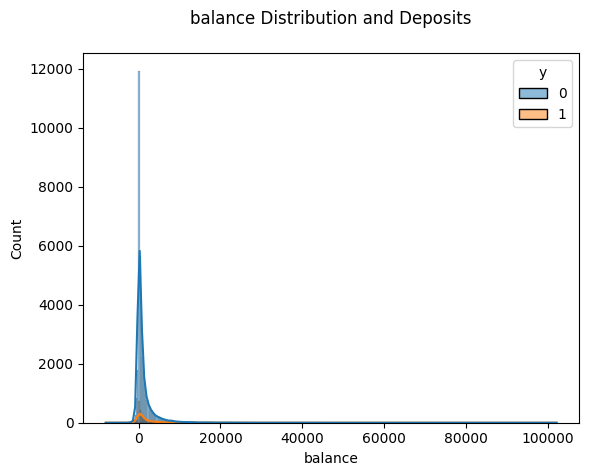

In [82]:
#filtered_Balance=Demo_Data[Demo_Data.balance<50000]
sns.histplot(x="balance", data=Demo_Data, kde=True, hue= "y")

plt.title("balance Distribution and Deposits\n")
plt.show()

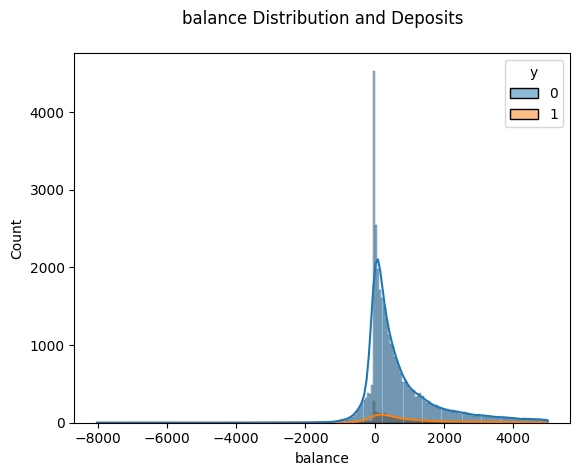

In [85]:
filtered_Balance=Demo_Data[Demo_Data.balance<5000]
sns.histplot(x="balance", data=filtered_Balance, kde=True, hue= "y")

plt.title("balance Distribution and Deposits\n")
plt.show()

In [58]:
Demo_Data_ANALYSIS= Demo_Data.drop(columns=['age','balance'])
Demo_Data_ANALYSIS.head()

,job,marital,education,default,housing,loan,y
0,management,married,tertiary,no,yes,no,no
1,technician,single,secondary,no,yes,no,no
2,entrepreneur,married,secondary,no,yes,yes,no
3,blue-collar,married,secondary,no,yes,no,no
4,blue-collar,single,secondary,no,no,no,no


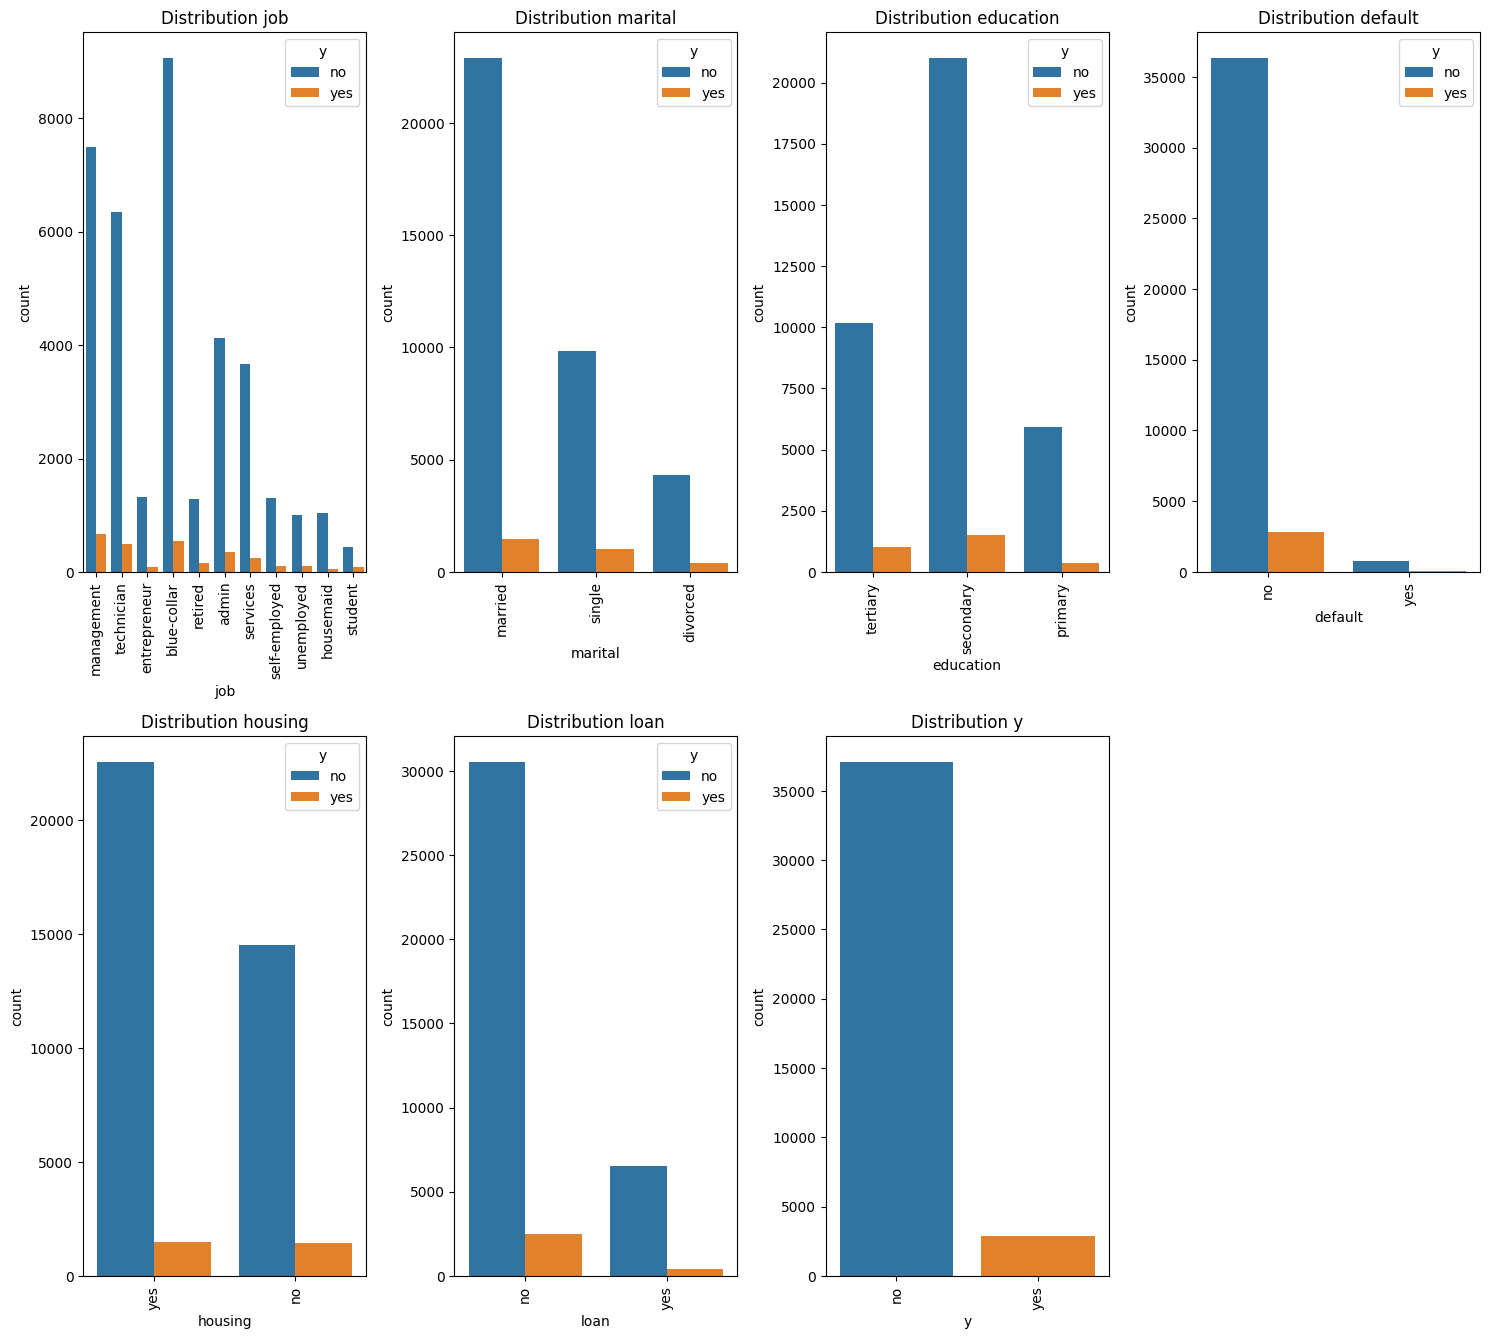

In [59]:
plt.figure(figsize=(15, 20))
for i, feature in enumerate(Demo_Data_ANALYSIS.columns):
    plt.subplot(3, 4, i+1)
    sns.countplot(data=Demo_Data_ANALYSIS, x=feature, hue='y')
    plt.title(f'Distribution {feature}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Remarks : 

- The majority of clients are within the 20–60 age range, with individuals aged 30–40 showing the highest likelihood of subscribing to term deposits.

- From the graph, we can infer that clients represented by the blue-collar , management and administrative roles are more likely to subscribe to a term deposit.

- A Married customers has higher likelihood of subscribing to term deposits, divorced people are broken and are less likely subscribe 

- Secondary, the higher  level rate of subscription

- A customer with no Personal loan has a higher subscription rate

-  Person who has past housing loan seems slightly high subscribe to Term Desposit compared to those who doesn,t have Housinh loan

# Check Imbalanced Dataset

Text(0.5, 1.0, 'Distribution of client subscribed to a term deposit')

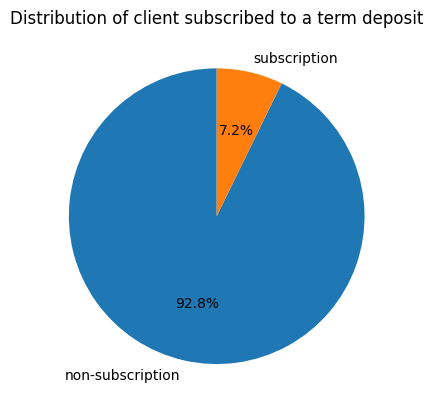

In [60]:
# y_count=Data["y"].value_counts(normalize=True)
labels = ['non-subscription', 'subscription']
Demo_Data["y"].value_counts(normalize=True)
plt.pie(Demo_Data['y'].value_counts(),labels=labels,autopct='%1.1f%%', startangle=90)
plt.title('Distribution of client subscribed to a term deposit')

- Since 92% of clients did not subscribe to a term deposit, the dataset is highly imbalanced. Therefore, relying solely on accuracy would be misleading. Instead, it is more appropriate to evaluate the model using alternative metrics such as recall, precision, or the F1 score.

### Convert Categorical Variable to Numeric

- Transforming categorical data into numerical form is a crucial step in preprocessing for machine learning. Since most algorithms operate on numerical inputs, this conversion guarantees compatibility, enhances model accuracy, and enables more effective feature engineering.

In [61]:

lbe = LabelEncoder()
Demo_Data['job'] = lbe.fit_transform(Demo_Data['job'])
Demo_Data['marital'] = lbe.fit_transform(Demo_Data['marital'])
Demo_Data['education'] = lbe.fit_transform(Demo_Data['education'])
Demo_Data['default'] = lbe.fit_transform(Demo_Data['default'])
Demo_Data['housing'] = lbe.fit_transform(Demo_Data['housing'])
Demo_Data['loan'] = lbe.fit_transform(Demo_Data['loan'])
Demo_Data['y'] = lbe.fit_transform(Demo_Data['y'])
Demo_Data.head()

,age,job,marital,education,default,balance,housing,loan,y
0,58,4,1,2,0,2143,1,0,0
1,44,9,2,1,0,29,1,0,0
2,33,2,1,1,0,2,1,1,0
3,47,1,1,1,0,1506,1,0,0
4,33,1,2,1,0,1,0,0,0


# Checking for Correlation among the Predictors

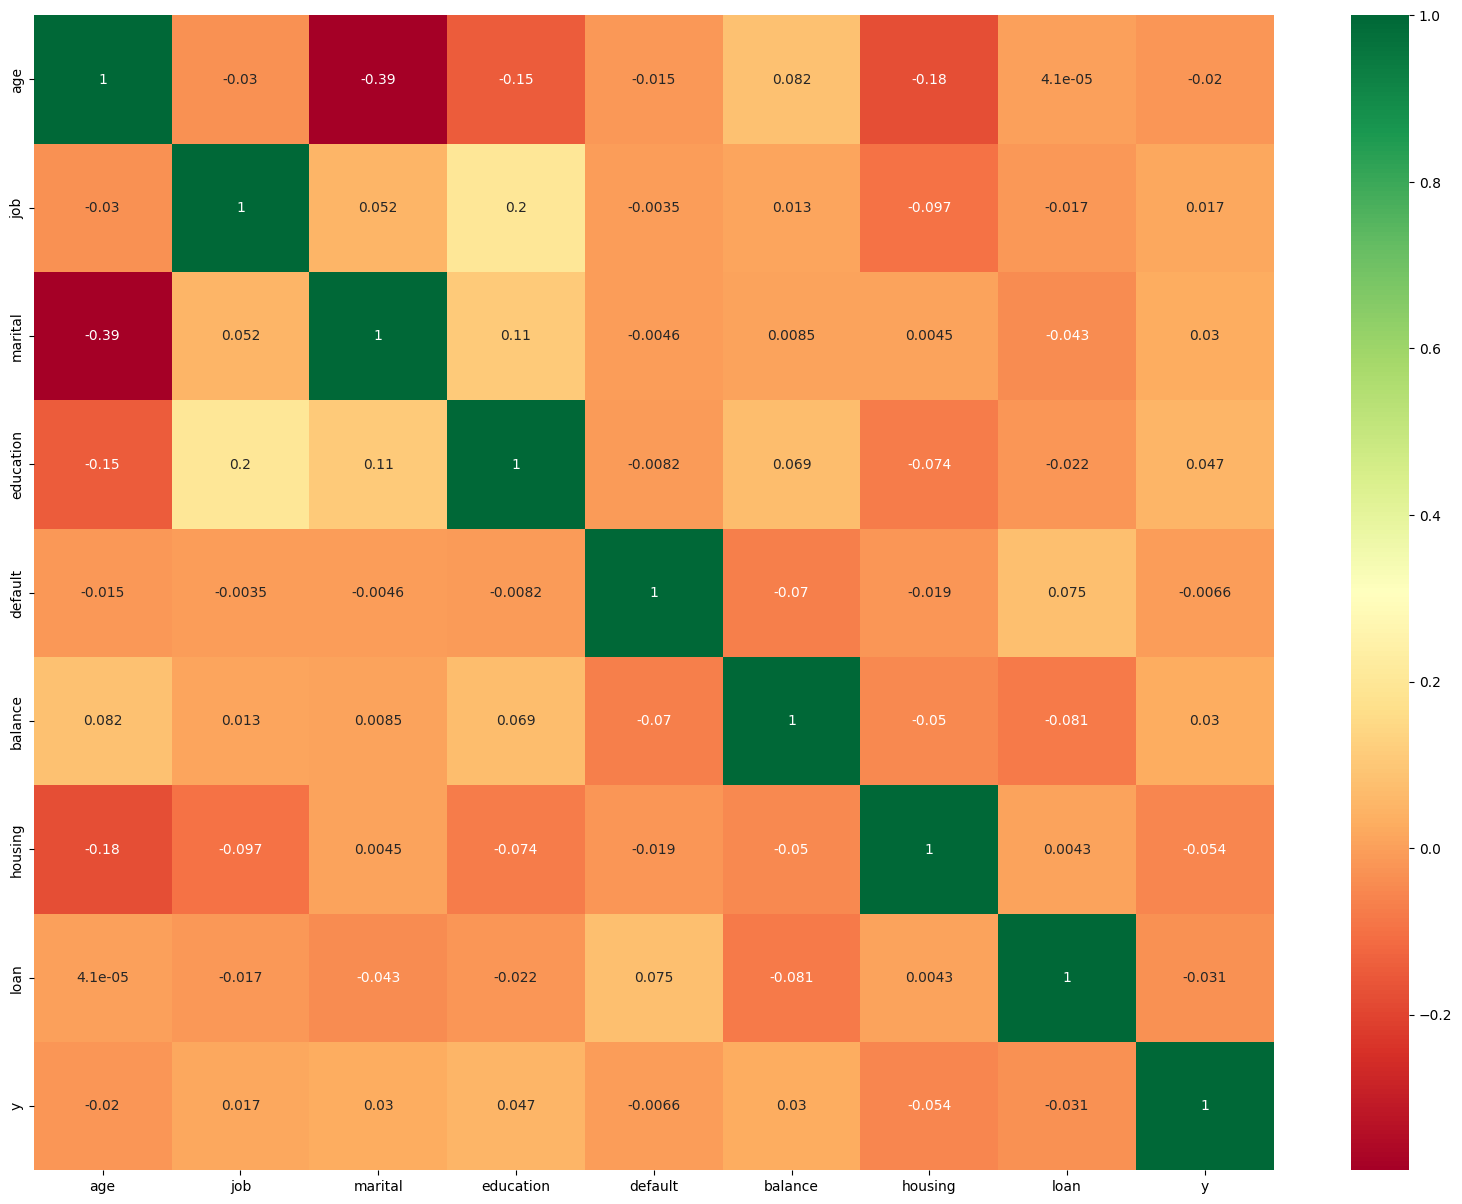

In [62]:
corr = Demo_Data.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

### We can see clearly that : 

- Most correlated variable are Job and Education 

# Handling Class Imbalance Using Random Under Sampler

In [63]:
Y=Demo_Data['y']
X = Demo_Data.drop('y',axis = 1)
Y_train, Y_test, X_train, X_test = train_test_split(Y, X, test_size=0.2, random_state=RANDOM_STATE)

In [64]:
print("Original class distribution:", Counter(Y))

undersample = RandomUnderSampler(sampling_strategy='majority')

X_under, Y_under = undersample.fit_resample(X_train, Y_train)

print("Undersampled class distribution:", Counter(Y_under))

Original class distribution: Counter({0: 37104, 1: 2896})
Undersampled class distribution: Counter({0: 2330, 1: 2330})


Text(0.5, 1.0, 'Distribution of client subscribed to a term deposit')

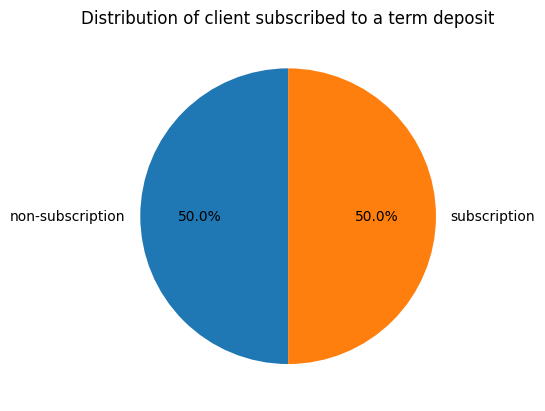

In [65]:
labels = ['non-subscription', 'subscription']
          
Y_under.value_counts(normalize=True)
plt.pie(Y_under.value_counts(),labels=labels,autopct='%1.1f%%', startangle=90)
plt.title('Distribution of client subscribed to a term deposit')

"The analysis shows that Age, Balance, Job, Marital status, and Education are the most impactful features in the dataset. Therefore, the company should focus primarily on Age, Balance, and Job when developing strategies to identify the most suitable clients to contact.

# Model Building Demographic Segmentation

### KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.94      0.55      0.69      7434
           1       0.08      0.50      0.13       566

    accuracy                           0.54      8000
   macro avg       0.51      0.52      0.41      8000
weighted avg       0.87      0.54      0.65      8000



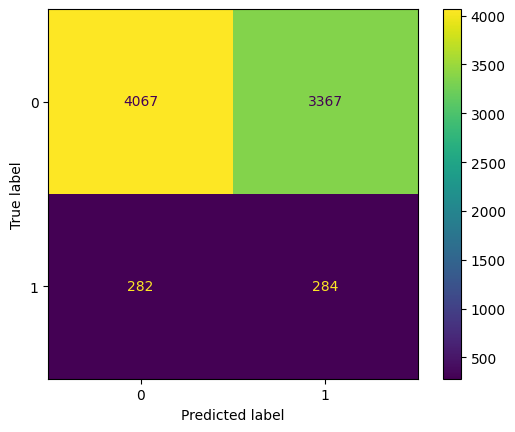

In [66]:
model_KNC = KNeighborsClassifier()
model_KNC.fit(X_under, Y_under)
Y_pred_KNC = model_KNC.predict(X_test)
model_KNC = accuracy_score(Y_test, Y_pred_KNC)
print(classification_report(Y_test, Y_pred_KNC))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_KNC)
plt.show()

### DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.94      0.53      0.67      7434
           1       0.08      0.55      0.14       566

    accuracy                           0.53      8000
   macro avg       0.51      0.54      0.41      8000
weighted avg       0.88      0.53      0.64      8000



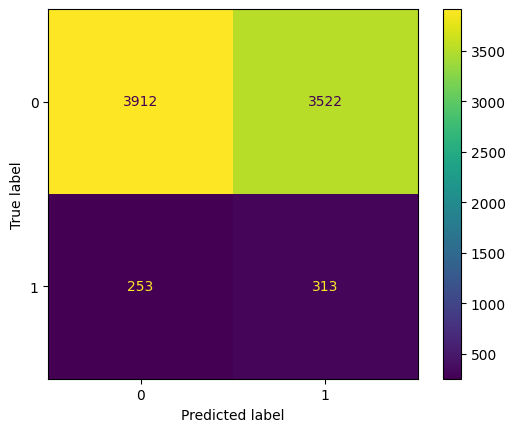

In [67]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_under, Y_under)
Y_pred_DT = model_DT.predict(X_test)
model_DT = accuracy_score(Y_test, Y_pred_DT)
print(classification_report(Y_test, Y_pred_DT))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_DT)
plt.show()

### LogisticRegression

              precision    recall  f1-score   support

           0       0.94      0.61      0.74      7434
           1       0.09      0.54      0.16       566

    accuracy                           0.60      8000
   macro avg       0.52      0.57      0.45      8000
weighted avg       0.88      0.60      0.70      8000



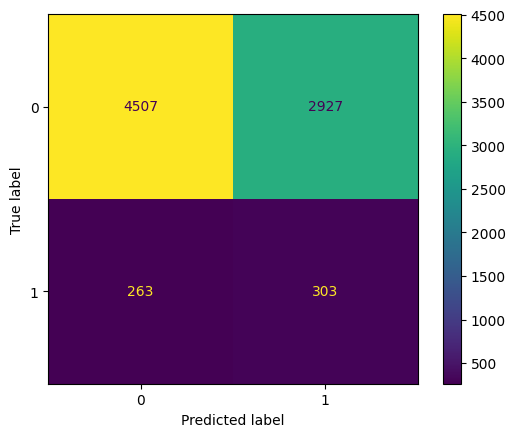

In [68]:
model_LG = LogisticRegression()
model_LG.fit(X_under, Y_under)
Y_pred_LG = model_LG.predict(X_test)
model_LG = accuracy_score(Y_test, Y_pred_LG)
print(classification_report(Y_test, Y_pred_LG))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_LG)
plt.show()

# SVC

              precision    recall  f1-score   support

           0       0.94      0.74      0.82      7434
           1       0.09      0.36      0.15       566

    accuracy                           0.71      8000
   macro avg       0.52      0.55      0.49      8000
weighted avg       0.88      0.71      0.78      8000



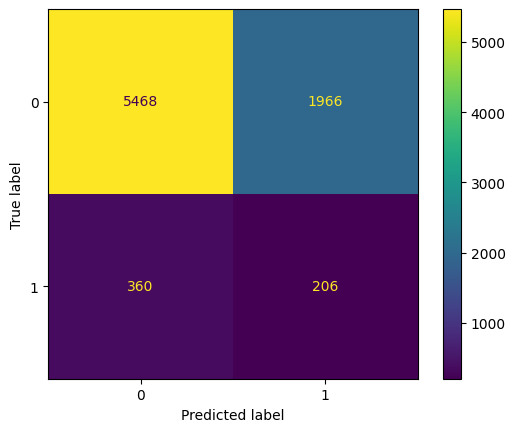

In [69]:
model_SVC = SVC()
model_SVC.fit(X_under, Y_under)
Y_pred_SVC = model_SVC.predict(X_test)
# score_SVC = accuracy_score(Y_test, Y_pred_SVC)
print(classification_report(Y_test, Y_pred_SVC))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_SVC)
plt.show()

# RandomForestClassifier

              precision    recall  f1-score   support

           0       0.94      0.58      0.72      7434
           1       0.09      0.56      0.16       566

    accuracy                           0.57      8000
   macro avg       0.52      0.57      0.44      8000
weighted avg       0.88      0.57      0.68      8000



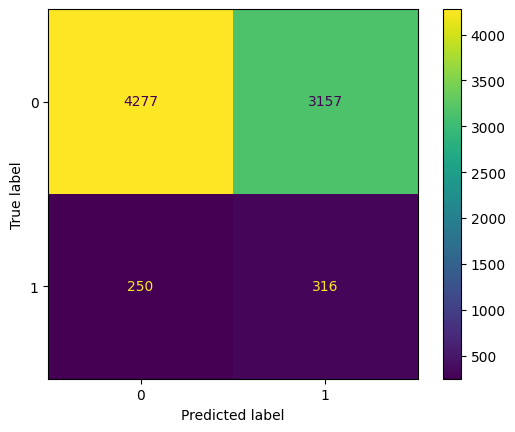

In [70]:
model_RF_ = RandomForestClassifier()
model_RF_.fit(X_under, Y_under)
Y_pred_RF_ = model_RF_.predict(X_test)
# score_RF_ = accuracy_score(Y_test, Y_pred_RF_)
print(classification_report(Y_test, Y_pred_RF_))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_RF_)
plt.show()

Remark:
Based on the above results, we can see that the Random Forest Model is the best for predicting 348 clients on true positives and 4210 true negatives, but the accuracy is 0.57 compared to the other 4 models.

# Hyperparameter Optimizations

- **Optuna** is a machine learning framework specifically designed for automating **hyperparameter optimization**, that is, finding an externally fixed setting of machine learning model hyperparameters that optimizes the model’s performance. It can be seamlessly integrated with other machine learning modeling frameworks with **Scikit-learn**.

In [71]:
# 01 with X_under and Y_under
# Best trial value (mean accuracy): 0.5916309012875537
# Best hyperparameters: {'n_estimators': 117, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 5}
# Load a sample dataset

def objective(trial):
    """Defines the objective function for Optuna."""
    # Suggest hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 50, 150)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Define the Random Forest Classifier with suggested hyperparameters
    RF_HO = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=RANDOM_STATE,
        n_jobs=-1 
    )

    # Use 5-fold cross-validation
    # StratifiedKFold is used for classification tasks to preserve class distribution in each fold
    cv_splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    
    # Calculate cross-validation scores (e.g., accuracy)
    score = cross_val_score(
        RF_HO, X_under, Y_under, 
        cv=cv_splitter, 
        scoring='accuracy', 
        n_jobs=-1
    )

# Return the mean score to Optuna (Optuna will maximize this by default)
    return np.mean(score)

# Create a study object and specify the direction (maximize accuracy)

study = optuna.create_study(direction='maximize')

# Run the optimization process (e.g., for 150 trials)
#study.run(objective, n_trials=150)
study.optimize(objective, n_trials=150)

# Print the best hyperparameters and the corresponding mean cross-validation score

print(f"Best trial value (mean accuracy): {study.best_value}")
print(f"Best hyperparameters: {study.best_params}")

# Train the final model with the best hyperparameters on the full dataset

best_params = study.best_params
best_rf_model = RandomForestClassifier(**best_params, random_state=RANDOM_STATE)
best_rf_model.fit(X_under, Y_under)


[I 2026-02-17 12:42:56,376] A new study created in memory with name: no-name-a30978af-9827-4329-8744-824d32d69095
[I 2026-02-17 12:43:06,642] Trial 0 finished with value: 0.5738197424892705 and parameters: {'n_estimators': 62, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.5738197424892705.
[I 2026-02-17 12:43:13,273] Trial 1 finished with value: 0.5785407725321889 and parameters: {'n_estimators': 147, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.5785407725321889.
[I 2026-02-17 12:43:14,303] Trial 2 finished with value: 0.5804721030042919 and parameters: {'n_estimators': 89, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.5804721030042919.
[I 2026-02-17 12:43:15,019] Trial 3 finished with value: 0.5785407725321888 and parameters: {'n_estimators': 60, 'max_depth': 16, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.

Best trial value (mean accuracy): 0.5920600858369098
Best hyperparameters: {'n_estimators': 146, 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 2}


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",146
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",7
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

              precision    recall  f1-score   support

           0       0.95      0.61      0.74      7434
           1       0.10      0.56      0.17       566

    accuracy                           0.61      8000
   macro avg       0.52      0.59      0.46      8000
weighted avg       0.89      0.61      0.70      8000



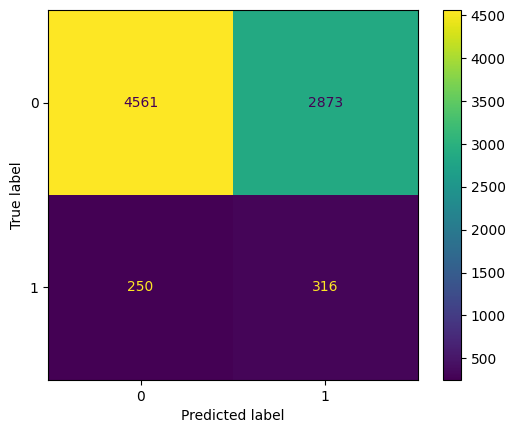

In [86]:
Y_pred_RF_HO = best_rf_model.predict(X_test)
score_RF_HO = accuracy_score(Y_test, Y_pred_RF_HO)
print(classification_report(Y_test, Y_pred_RF_HO))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_RF_HO)

plt.show()

# Features Importance 

- Feature importance is a method used to evaluate how much each variable in a dataset contributes to the predictions made by a machine learning model. It helps identify which features exert the greatest influence on the model’s output.
- In Decision Trees, feature importance is measured by how much each variable decreases impurity (such as Gini impurity or entropy). Features that create splits leading to purer nodes are considered more influential, and their importance scores are higher.

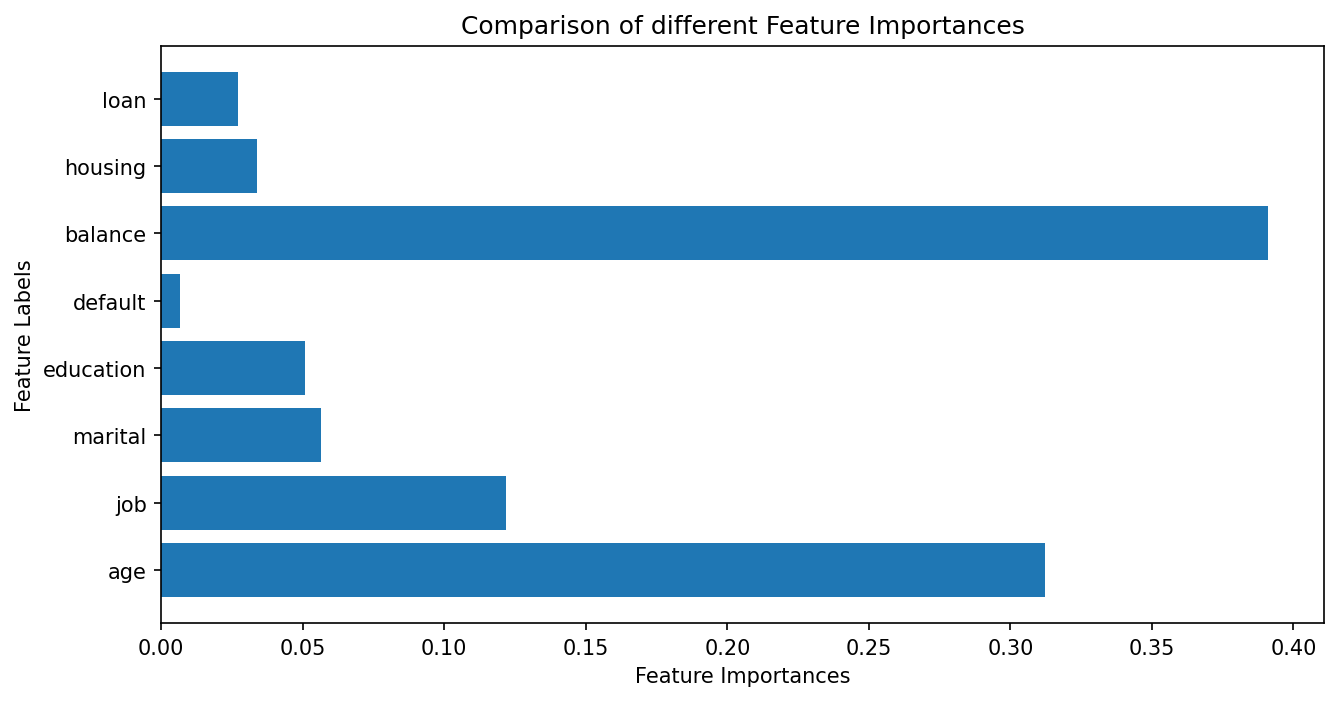

In [87]:
plt.figure(figsize=(10, 5), dpi=150)
feat_importances =best_rf_model.feature_importances_
plt.barh(X.columns, feat_importances)
plt.xlabel('Feature Importances')
plt.ylabel('Feature Labels')
plt.title('Comparison of different Feature Importances')
plt.show()

- Following the feature importance evaluation, the attributes Default, Housing, and Loan were removed due to their low contribution to the model’s predictive performance.

In [88]:
features_Selection = ['default','housing','loan']
Data_Select=Demo_Data.drop(columns=features_Selection)
Data_Select.head()

,age,job,marital,education,balance,y
0,58,4,1,2,2143,0
1,44,9,2,1,29,0
2,33,2,1,1,2,0
3,47,1,1,1,1506,0
4,33,1,2,1,1,0


# Hyperparameter Optimizations After removing features 

In [89]:
YS=Data_Select['y']
XS = Data_Select.drop('y',axis = 1)
YS_train, YS_test, XS_train, XS_test = train_test_split(YS, XS, test_size=0.2, random_state=RANDOM_STATE)

In [36]:
# 01 with XS_train and YS_train
# best_params_ 
# best_rf_model_
# Load a sample dataset

def objective(trial):
    """Defines the objective function for Optuna."""
    # Suggest hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 50, 150)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Define the Random Forest Classifier with suggested hyperparameters
    RF_HO = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=RANDOM_STATE,
        n_jobs=-1 
    )

    # Use 5-fold cross-validation
    # StratifiedKFold is used for classification tasks to preserve class distribution in each fold
    cv_splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    
    # Calculate cross-validation scores (e.g., accuracy)
    score = cross_val_score(
        RF_HO, XS_train, YS_train, 
        cv=cv_splitter, 
        scoring='accuracy', 
        n_jobs=-1
    )

    # Return the mean score to Optuna (Optuna will maximize this by default)
    return np.mean(score)

# Create a study object and specify the direction (maximize accuracy)
study = optuna.create_study(direction='maximize')

# Run the optimization process (e.g., for 100 trials)
#study.run(objective, n_trials=100)
study.optimize(objective, n_trials=150)

# Print the best hyperparameters and the corresponding mean cross-validation score

print(f"Best trial value (mean accuracy): {study.best_value}")
print(f"Best hyperparameters: {study.best_params}")

# Train the final model with the best hyperparameters on the full dataset

best_params_ = study.best_params
best_rf_model_ = RandomForestClassifier(**best_params_, random_state=RANDOM_STATE)
best_rf_model.fit(XS_train, YS_train)


[I 2026-02-17 12:06:49,319] A new study created in memory with name: no-name-c957ba27-243a-4c4e-8daa-55b8864bd8c1
[I 2026-02-17 12:07:05,979] Trial 0 finished with value: 0.9269999999999999 and parameters: {'n_estimators': 68, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.9269999999999999.
[I 2026-02-17 12:07:18,966] Trial 1 finished with value: 0.9268750000000001 and parameters: {'n_estimators': 115, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9269999999999999.
[I 2026-02-17 12:07:23,888] Trial 2 finished with value: 0.9268437500000001 and parameters: {'n_estimators': 91, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.9269999999999999.
[I 2026-02-17 12:07:32,182] Trial 3 finished with value: 0.9269999999999999 and parameters: {'n_estimators': 121, 'max_depth': 19, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 0 with value: 

Best trial value (mean accuracy): 0.9272187500000001
Best hyperparameters: {'n_estimators': 127, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 4}


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",119
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",18
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7434
           1       0.40      0.01      0.02       566

    accuracy                           0.93      8000
   macro avg       0.66      0.50      0.49      8000
weighted avg       0.89      0.93      0.90      8000



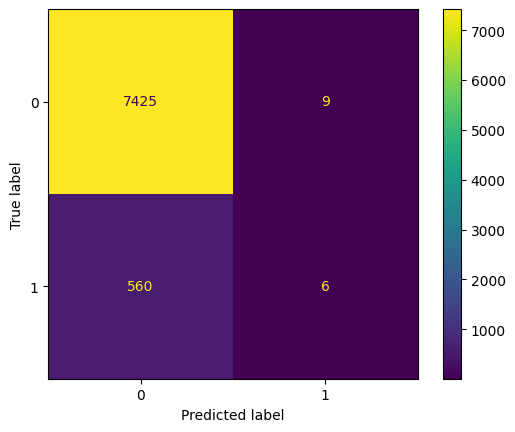

In [72]:
# Best trial value (mean accuracy): 0.9272187500000001
# Best hyperparameters: {'n_estimators': 127, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 4}

best_params_ = study.best_params
best_rf_model_ = RandomForestClassifier(**best_params_, random_state=RANDOM_STATE)
best_rf_model_.fit(XS_train, YS_train)
Y_pred_RF_HO_ = best_rf_model_.predict(XS_test)
#score_RF_HO_ = accuracy_score(YS_test, Y_pred_RF_HO_)
print(classification_report(YS_test, Y_pred_RF_HO_))
ConfusionMatrixDisplay.from_predictions(YS_test, Y_pred_RF_HO_)
plt.show()

# Conclusion and Key Insights


The current marketing campaign depends on repeated phone calls to secure product subscriptions. To improve efficiency and reduce costs, it is recommended that the bank first identify clients with the highest probability of subscribing to a term deposit. By prioritizing these clients for outreach, the campaign can minimize unnecessary calls, optimize resource allocation, and achieve better conversion rates.

Exploratory Data Analysis (EDA):

- The age distribution of clients highlighted that the majority fell in the 30-40 age range, coinciding with the highest subscription rate for term deposits.
- Occupation-wise, clients in administrative, blue-collar and management roles formed the majority and were more likely to subscribe to term deposits.
- Marital status leaned heavily toward the "married" category.
- Clients with university degrees or high-level education were more prominent and had a higher subscription rate.
- Credit defaults were rare, with the vast majority of clients having no credit defaults.
- Clients with housing loans are slightly more likely to subscribe to term deposits, while those with personal loans were less likely.


# Model Building for full dataset segmentations

- Instead of dividing the features into demographic and campaign-based segments, we will construct the model using all available data. This approach ensures that variables such as age, job, marital status, education, balance, contact details, and campaign-related attributes are considered together, allowing the model to capture the full range of relationships across the dataset

### Convert Categorical Variable to Numeric

In [6]:
lbe = LabelEncoder()
Data['job'] = lbe.fit_transform(Data['job'])
Data['marital'] = lbe.fit_transform(Data['marital'])
Data['education'] = lbe.fit_transform(Data['education'])
Data['default'] = lbe.fit_transform(Data['default'])
Data['housing'] = lbe.fit_transform(Data['housing'])
Data['contact'] = lbe.fit_transform(Data['contact'])
Data['month'] = lbe.fit_transform(Data['month'])
Data['loan'] = lbe.fit_transform(Data['loan'])
Data['y'] = lbe.fit_transform(Data['y'])
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0


### Check Imbalanced Dataset

Text(0.5, 1.0, 'Distribution of client subscribed to a term deposit')

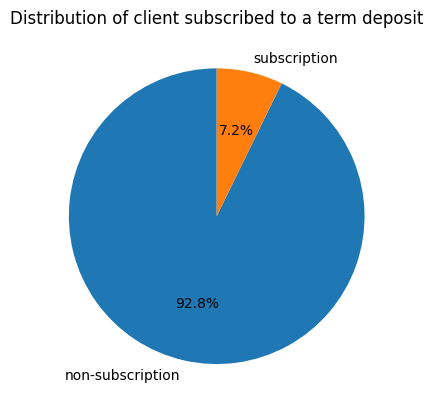

In [7]:
labels = ['non-subscription', 'subscription']
Data["y"].value_counts(normalize=True)
plt.pie(Data['y'].value_counts(),labels=labels,autopct='%1.1f%%', startangle=90)
plt.title('Distribution of client subscribed to a term deposit')

### Checking for Correlation among the Variables

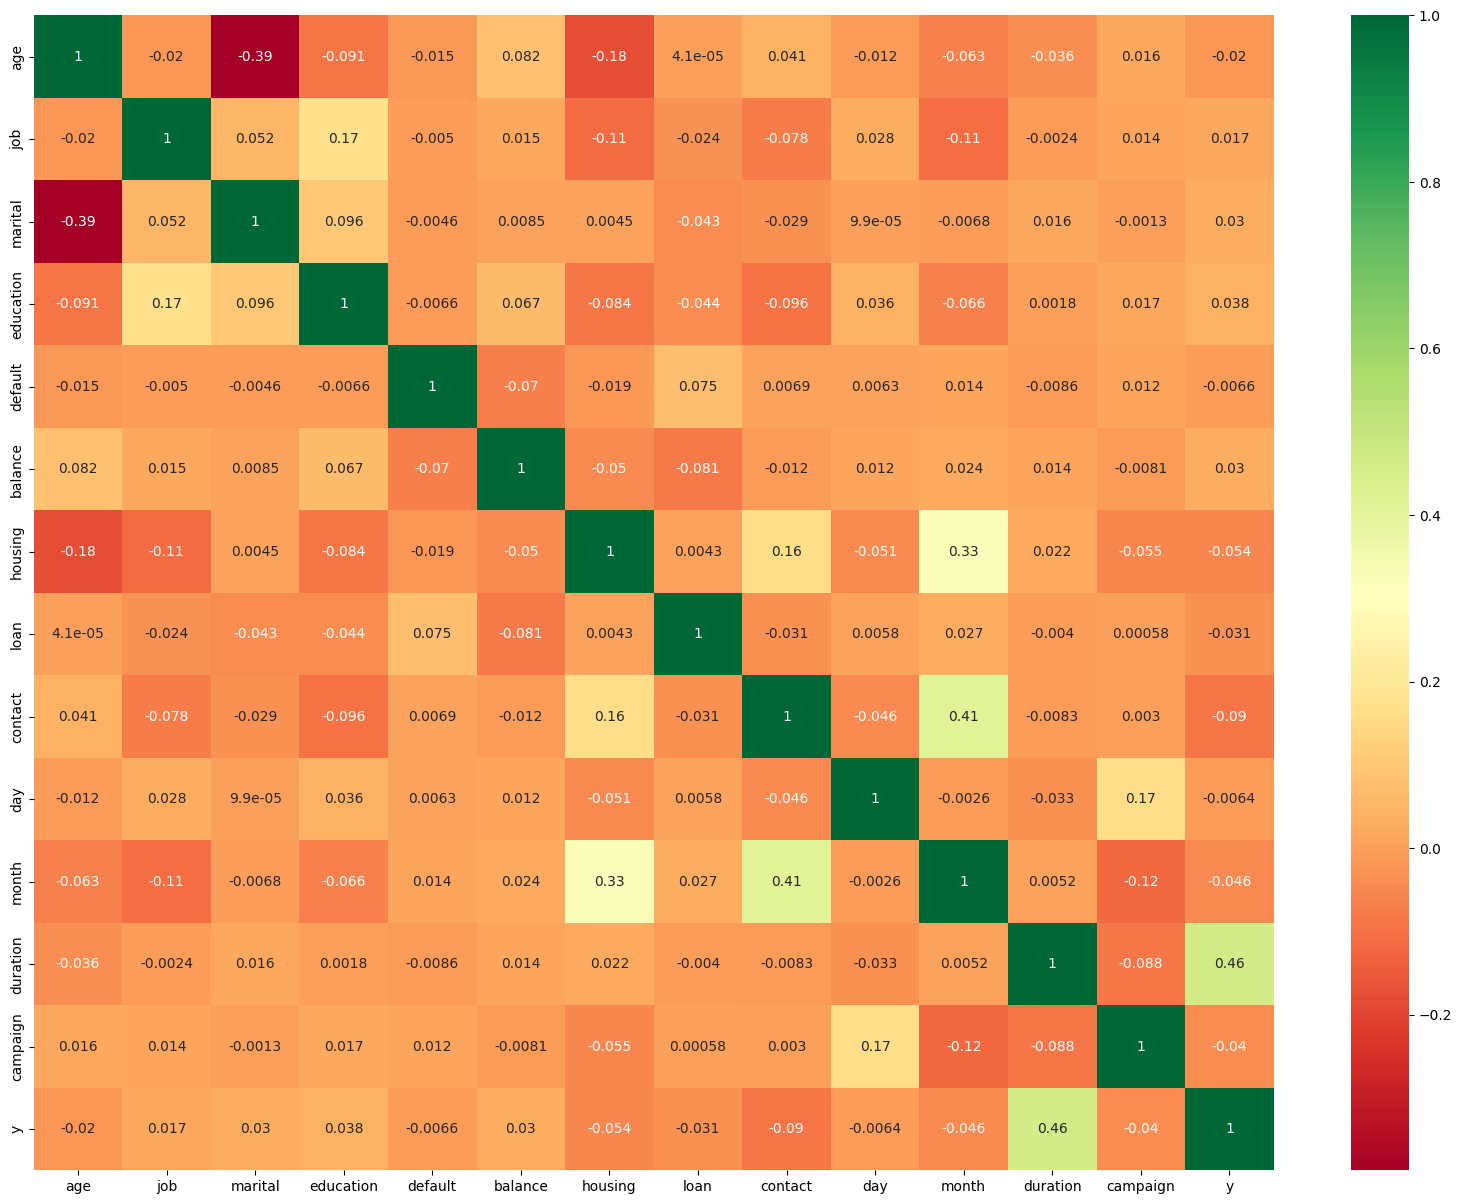

In [9]:
corr = Data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

### Remarks :

- Duration and 'Y' target Value have a strong positive correlation (close to 0.5), meaning more Duration Call generally leads to a higher chance for Term Deposit subscriptions.
- Months means time to contact, and contact has a strong positive correlation of 0.41, which means the right time (month) to contact the client generally leads to a higher chance for Term Deposit subscriptions.
- Age and Marital status have a Negative correlation (-0.39), meaning that when you’re younger, marriage is less likely because most people are still focused on education, career, and personal growth rather than long‑term commitment

### Handling Class Imbalance Using Random Under Sampler

In [11]:
YF=Data['y']
XF = Data.drop('y',axis = 1)
YF_train, YF_test, XF_train, XF_test = train_test_split(YF, XF, test_size=0.2, random_state=RANDOM_STATE)

In [12]:
print("Original class distribution:", Counter(YF))

undersample_FULL = RandomUnderSampler(sampling_strategy='majority')

XF_under, YF_under = undersample_FULL.fit_resample(XF_train, YF_train)

print("Undersampled class distribution:", Counter(YF_under))


Original class distribution: Counter({0: 37104, 1: 2896})
Undersampled class distribution: Counter({0: 2330, 1: 2330})


# Model Building for full dataset segmentations

- To evaluate the predictive power of our dataset, we will build and compare several machine learning models. The chosen algorithms represent a mix of linear, non-linear, and ensemble approaches, allowing us to capture different types of relationships within the data. Specifically, we will implement K-Nearest Neighbors (KNN), Random Forest, Support Vector Classifier (SVC), Logistic Regression, and Decision Tree models. By applying this diverse set of techniques, we aim to assess performance across multiple perspectives and identify the most effective model for our problem


### KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      7434
           1       0.22      0.76      0.34       566

    accuracy                           0.79      8000
   macro avg       0.60      0.78      0.61      8000
weighted avg       0.92      0.79      0.84      8000



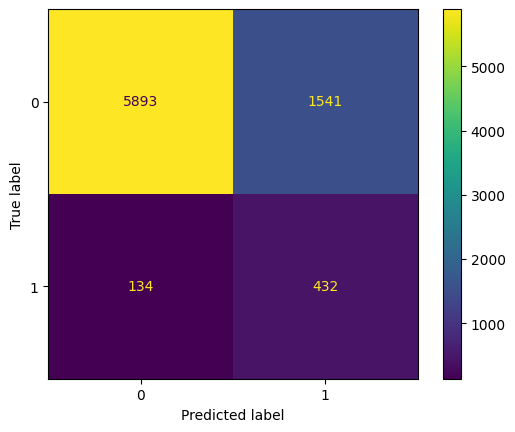

In [15]:
modelF_KNC = KNeighborsClassifier()
modelF_KNC.fit(XF_under, YF_under)
YF_pred_KNC = modelF_KNC.predict(XF_test)

print(classification_report(YF_test, YF_pred_KNC))
ConfusionMatrixDisplay.from_predictions(YF_test, YF_pred_KNC)
plt.show()

### DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      7434
           1       0.27      0.84      0.41       566

    accuracy                           0.83      8000
   macro avg       0.63      0.84      0.66      8000
weighted avg       0.94      0.83      0.87      8000



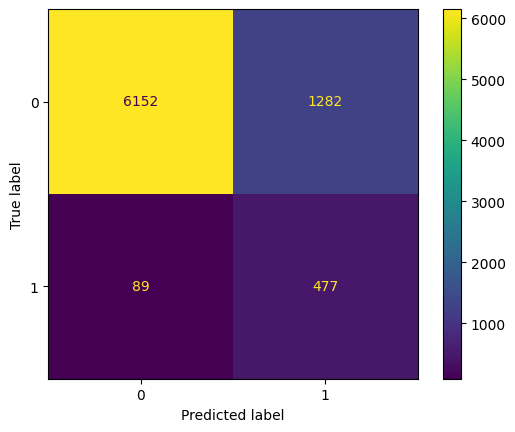

In [16]:
modelF_DT = DecisionTreeClassifier()
modelF_DT.fit(XF_under, YF_under)
YF_pred_DT = modelF_DT.predict(XF_test)

print(classification_report(YF_test, YF_pred_DT))
ConfusionMatrixDisplay.from_predictions(YF_test, YF_pred_DT)
plt.show()

### LogisticRegression

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      7434
           1       0.26      0.79      0.39       566

    accuracy                           0.83      8000
   macro avg       0.62      0.81      0.65      8000
weighted avg       0.93      0.83      0.86      8000



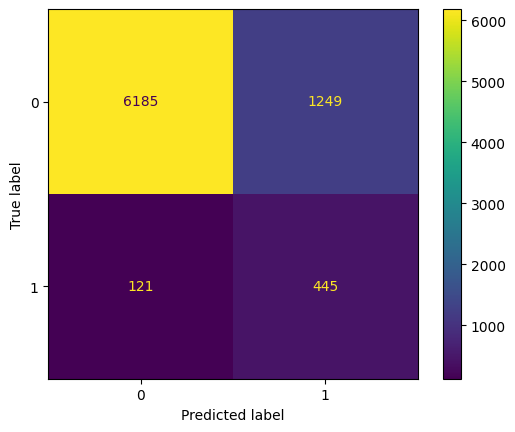

In [17]:
modelF_LG = LogisticRegression()
modelF_LG.fit(XF_under, YF_under)
YF_pred_LG = modelF_LG.predict(XF_test)

print(classification_report(YF_test, YF_pred_LG))
ConfusionMatrixDisplay.from_predictions(YF_test, YF_pred_LG)
plt.show()

### SVC

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7434
           1       0.28      0.75      0.41       566

    accuracy                           0.85      8000
   macro avg       0.63      0.80      0.66      8000
weighted avg       0.93      0.85      0.88      8000



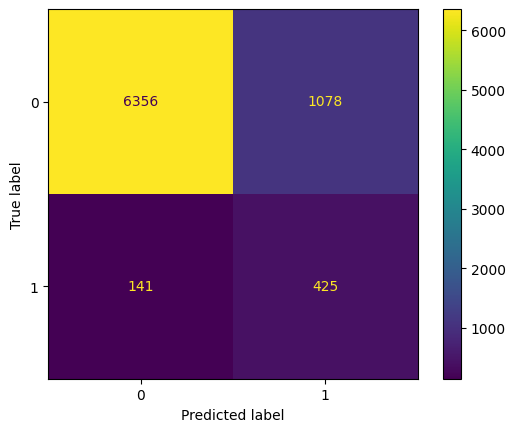

In [18]:
modelF_SVC = SVC()
modelF_SVC.fit(XF_under, YF_under)
YF_pred_SVC = modelF_SVC.predict(XF_test)
# score_SVC = accuracy_score(Y_test, Y_pred_SVC)
print(classification_report(YF_test, YF_pred_SVC))
ConfusionMatrixDisplay.from_predictions(YF_test, YF_pred_SVC)
plt.show()

### RandomForestClassifier

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      7434
           1       0.32      0.92      0.47       566

    accuracy                           0.85      8000
   macro avg       0.65      0.88      0.69      8000
weighted avg       0.94      0.85      0.88      8000



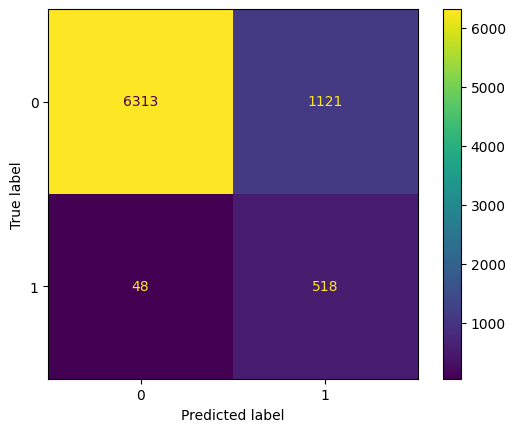

In [19]:
modelF_RF_ = RandomForestClassifier()
modelF_RF_.fit(XF_under, YF_under)
YF_pred_RF_ = modelF_RF_.predict(XF_test)
# score_RF_ = accuracy_score(Y_test, Y_pred_RF_)
print(classification_report(YF_test, YF_pred_RF_))
ConfusionMatrixDisplay.from_predictions(YF_test, YF_pred_RF_)
plt.show()

## Remark :

- The Random Forest Classifier proved to be the most effective model for predicting class ‘1’ (clients subscribing to term deposits), achieving the highest f1 score of 0.47, with 518 true positives and 6,313 true negatives—outperforming the other four models.

# Hyperparameter Optimizations for full dataset segmentations

In [22]:
# Load a sample dataset

def objective(trial):
    """Defines the objective function for Optuna."""
    # Suggest hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 50, 150)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Define the Random Forest Classifier with suggested hyperparameters
    RF_HO_F = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=RANDOM_STATE,
        n_jobs=-1 
    )

    # Use 5-fold cross-validation
    # StratifiedKFold is used for classification tasks to preserve class distribution in each fold
    cv_splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    
    # Calculate cross-validation scores (e.g., accuracy)
    score = cross_val_score(
        RF_HO_F, XF_under, YF_under, 
        cv=cv_splitter, 
        scoring='accuracy', 
        n_jobs=-1
    )

    # Return the mean score to Optuna (Optuna will maximize this by default)
    return np.mean(score)

# Create a study object and specify the direction (maximize accuracy)
study = optuna.create_study(direction='maximize')

# Run the optimization process (e.g., for 100 trials)
#study.run(objective, n_trials=100)
study.optimize(objective, n_trials=150)

# Print the best hyperparameters and the corresponding mean cross-validation score

print(f"Best trial value (mean accuracy): {study.best_value}")
print(f"Best hyperparameters: {study.best_params}")

# Train the final model with the best hyperparameters on the full dataset

best_params_F = study.best_params
best_rf_model_F = RandomForestClassifier(**best_params_F, random_state=RANDOM_STATE)
best_rf_model_F.fit(XF_under, YF_under)


[I 2026-02-18 13:46:36,243] A new study created in memory with name: no-name-1aa6085b-4315-4a80-83d1-0ed9889f6b93
[I 2026-02-18 13:46:45,029] Trial 0 finished with value: 0.8716738197424891 and parameters: {'n_estimators': 95, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8716738197424891.
[I 2026-02-18 13:46:52,522] Trial 1 finished with value: 0.842274678111588 and parameters: {'n_estimators': 142, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8716738197424891.
[I 2026-02-18 13:46:53,314] Trial 2 finished with value: 0.8665236051502145 and parameters: {'n_estimators': 60, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8716738197424891.
[I 2026-02-18 13:46:54,577] Trial 3 finished with value: 0.8757510729613734 and parameters: {'n_estimators': 98, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 3 with value: 0.8

Best trial value (mean accuracy): 0.8802575107296138
Best hyperparameters: {'n_estimators': 146, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 1}


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",146
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",20
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7434
           1       0.31      0.92      0.46       566

    accuracy                           0.85      8000
   macro avg       0.65      0.88      0.69      8000
weighted avg       0.94      0.85      0.88      8000



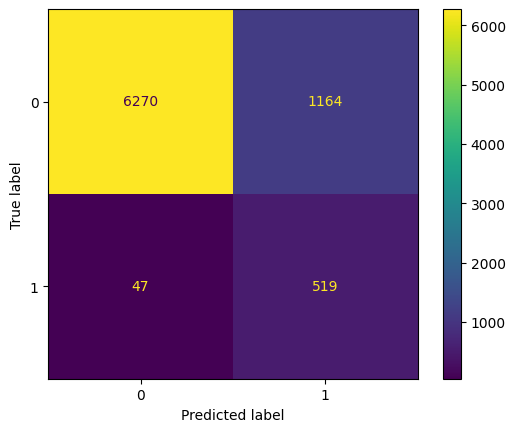

In [23]:
Y_pred_RF_HO_F = best_rf_model_F.predict(XF_test)
print(classification_report(YF_test, Y_pred_RF_HO_F))
ConfusionMatrixDisplay.from_predictions(YF_test, Y_pred_RF_HO_F)

plt.show()

## Features Importance 

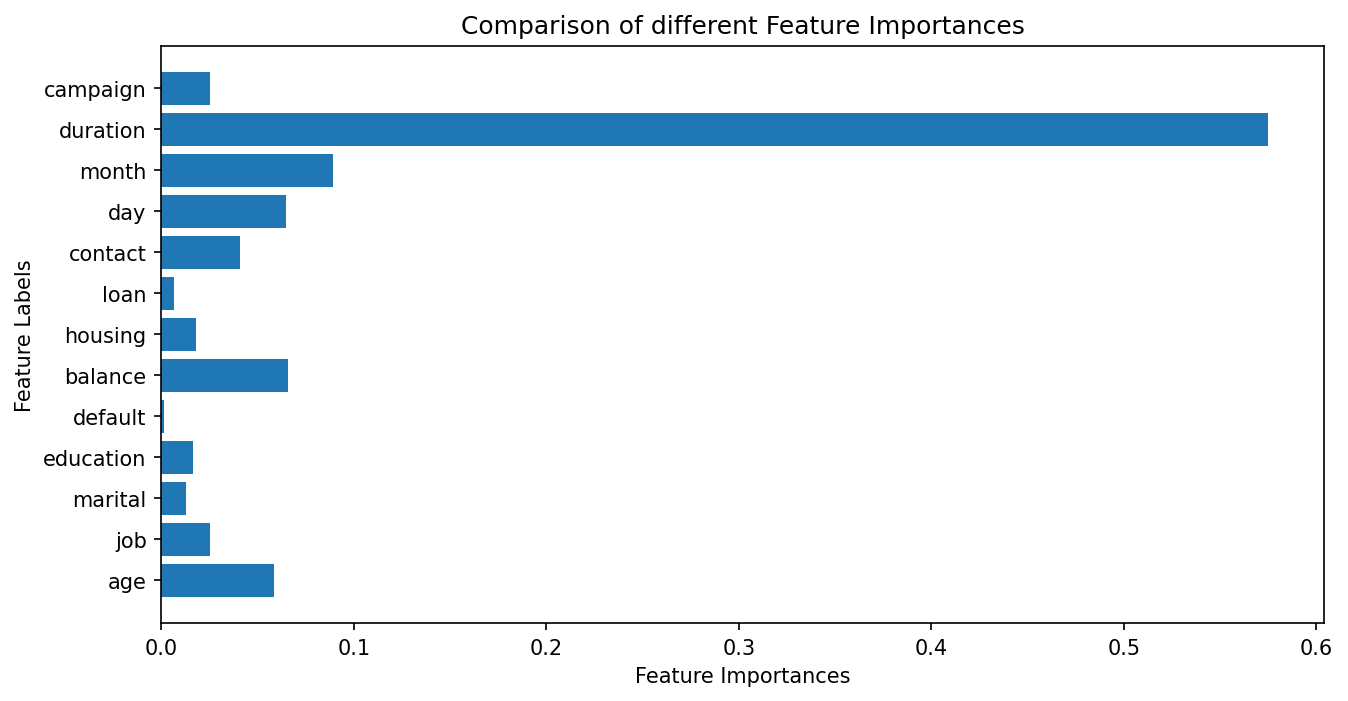

In [24]:
plt.figure(figsize=(10, 5), dpi=150)
feat_importancesF =best_rf_model_F.feature_importances_
plt.barh(XF.columns, feat_importancesF)
plt.xlabel('Feature Importances')
plt.ylabel('Feature Labels')
plt.title('Comparison of different Feature Importances')
plt.show()

- Based on the exploratory data analysis and model selection, it is evident that **call duration** plays a significant role in determining the outcome of the dataset. Leads who show greater interest in initiating a deposit tend to have more frequent interactions, with call lengths exceeding the average. Additionally, factors such as job role and balance emerge as key influencers, strongly shaping the likelihood of a positive result.

# Conclusion : 

#### Model Building and Evaluation:

- We aimed to reduce marketing costs and boost revenue by adopting a targeted outreach strategy. Using segmentation and classification, we shifted from contacting all customers to focusing on those most likely to be interested in term deposits

- Exploring Data shows that most term deposit subscribers are between 30 and 40 years old, particularly those in administrative, blue‑collar, and management roles. The majority are married and hold university or higher education degrees, which correlates with higher subscription rates. Credit defaults are rare, with most clients having none. Additionally, clients with housing loans are slightly more inclined to subscribe, while those with personal loans are less likely.

- To identify the best-performing model, we trained and evaluated Decision Tree, Random Forest, K‑Nearest Neighbors, Logistic Regression, and Support Vector Classifier algorithms using recall and F1 score as key metrics. Among these, **the Random Forest Classifier** proved to be the most effective, achieving a strong recall of 0.92, balanced precision–recall trade‑offs (F1 scores of 0.91 for class 0 and 0.46 for class 1), and an overall accuracy of 0.85. These results highlight Random Forest as the optimal choice for this task.


#### Insights:

- Call duration proved to be a key factor in predicting term deposit subscriptions. Longer conversations were more likely to result in customer sign‑ups, highlighting the importance of maintaining effective engagement during calls